In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("all_together.csv")
df.head()

,label,file,link,category,emotiveness,errors,pausatility,text,tokens,words in upper case,average sentence length,nouns,verbs,adverbs,adjectives,pronouns,date
0,fake,1.txt,ceticismopolitico.com,politica,0.263158,0.000000,2.000000,"katia abreu diz vai colocar expulsao moldura, ...",211.0,6.0,14.23080,46.0,30.0,13.0,7.0,26.0,2017-11-30
1,fake,10.txt,ceticismopolitico.com,politica,0.241667,0.007874,2.500000,"dr. ray peita bolsonaro, chama-o conservador f...",289.0,0.0,18.14290,64.0,56.0,18.0,11.0,20.0,2017-11-24
2,fake,100.txt,afolhabrasil.com.br,politica,0.127820,0.003636,1.812500,reinaldo azevedo desmascarado policia federal....,304.0,0.0,17.18750,88.0,45.0,8.0,9.0,18.0,2017-05-23
3,fake,1000.txt,diariodobrasil.org,politica,0.229008,0.001748,2.680000,relatorio assustador bndes mostra dinheiro pub...,639.0,14.0,22.88000,175.0,87.0,21.0,39.0,34.0,2017-07-24
4,fake,1001.txt,diariodobrasil.org,politica,0.269231,0.000000,0.894737,"radialista americano fala sobre pt: ""eles vend...",128.0,1.0,5.84211,31.0,21.0,8.0,6.0,12.0,2017-07-25


In [3]:
true_count = df[df.label == "true"].count()["label"]
false_count = df[df.label == "fake"].count()["label"]
print("True", true_count)
print("Fake", false_count)

True 3600
Fake 3600


### Distribuição de fake news por sites

In [16]:
# ax = df[['link', 'label']].value_counts().plot.barh(figsize=(10,7))
# Styling
def color_green(val):
    color = "red" if val == "fake" else "green"
    return "color: {col}".format(col=color)


def make_bold(val):
    weight = 700 if val == "fake" else 400
    return "font-weight: {weight}".format(weight=weight)


df[["link", "label"]].value_counts()

link                             label
diariodobrasil.org               fake     3337
g1.globo.com                     true     2300
politica.estadao.com.br          true      753
afolhabrasil.com.br              fake      174
internacional.estadao.com.br     true      114
cultura.estadao.com.br           true       95
www1.folha.uol.com.br            true       91
thejornalbrasil.com.br           fake       66
economia.estadao.com.br          true       51
brasil.estadao.com.br            true       46
esportes.estadao.com.br          true       30
alias.estadao.com.br             true       29
ceticismopolitico.com            fake       16
sao-paulo.estadao.com.br         true       16
saude.estadao.com.br             true       15
sustentabilidade.estadao.com.br  true       13
opiniao.estadao.com.br           true       11
topfivetv.com                    fake        7
estadao.com.br                   true        7
educacao.estadao.com.br          true        7
ciencia.estadao.com.b

É possível ver que a maior parte das notícias vem de sites como diariodobrasil.org, g1.globo e estadao.com.br.

Dentre os sites utilizados, pode-se perceber que apenas os sites diariodobrasil.org,
afolhabrasil.com.br, thejornalbrasil.com.br, ceticismopolitico.com.br e topfivetv.com.br foram utilizados como fontes de Fakenews.

Nenhum site teve disseminação de ambas as notícias (verdadeiras e falsas), ou um, ou outro.

### Distribuição temporal de fake news

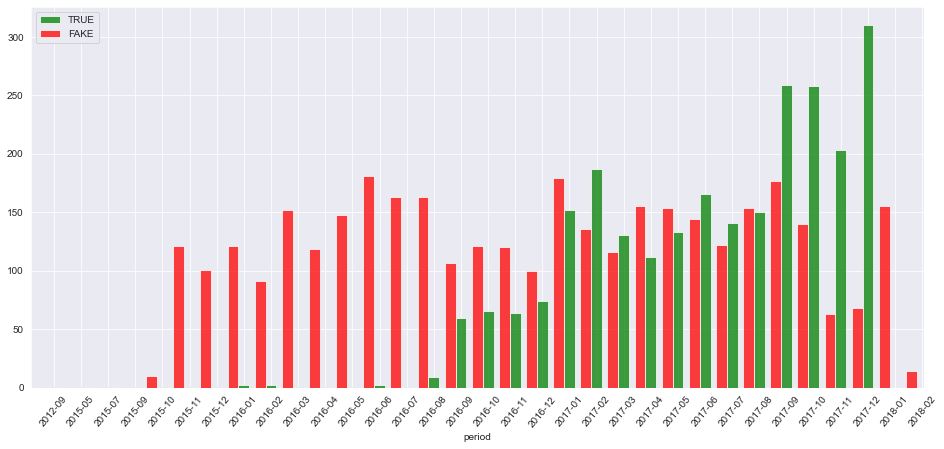

In [147]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d", errors="coerce")
df["period"] = df["date"].dt.to_period("m")

i = -0.5
for k, c in {"true": "green", "fake": "red"}.items():
    i += 1
    ax = (
        df[df["label"] == k]
        .groupby("period")["label"]
        .count()
        .plot.bar(
            figsize=(16, 7),
            label=k.upper(),
            alpha=0.75,
            rot=50,
            legend=True,
            color=c,
            width=0.4,
            position=i,
        )
    )
plt.show()

In [148]:
df.head()

,label,file,link,category,emotiveness,errors,pausatility,text,tokens,words in upper case,average sentence length,nouns,verbs,adverbs,adjectives,pronouns,date,period
0,fake,1.txt,ceticismopolitico.com,politica,0.263158,0.000000,2.000000,"katia abreu diz vai colocar expulsao moldura, ...",211.0,6.0,14.23080,46.0,30.0,13.0,7.0,26.0,2017-11-30,2017-11
1,fake,10.txt,ceticismopolitico.com,politica,0.241667,0.007874,2.500000,"dr. ray peita bolsonaro, chama-o conservador f...",289.0,0.0,18.14290,64.0,56.0,18.0,11.0,20.0,2017-11-24,2017-11
2,fake,100.txt,afolhabrasil.com.br,politica,0.127820,0.003636,1.812500,reinaldo azevedo desmascarado policia federal....,304.0,0.0,17.18750,88.0,45.0,8.0,9.0,18.0,2017-05-23,2017-05
3,fake,1000.txt,diariodobrasil.org,politica,0.229008,0.001748,2.680000,relatorio assustador bndes mostra dinheiro pub...,639.0,14.0,22.88000,175.0,87.0,21.0,39.0,34.0,2017-07-24,2017-07
4,fake,1001.txt,diariodobrasil.org,politica,0.269231,0.000000,0.894737,"radialista americano fala sobre pt: ""eles vend...",128.0,1.0,5.84211,31.0,21.0,8.0,6.0,12.0,2017-07-25,2017-07


In [154]:
df.describe()

,emotiveness,errors,pausatility,tokens,words in upper case,average sentence length,nouns,verbs,adverbs,adjectives,pronouns
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.00000,7200.000000,7200.000000,7200.000000
mean,0.209758,0.003065,2.755722,742.763333,7.680694,18.229019,182.920278,100.76750,30.014444,33.154444,38.758056
std,0.070239,0.007780,1.154137,774.155454,9.860613,6.090270,186.507322,108.03151,37.742105,39.702327,51.759915
min,0.000000,0.000000,0.250000,11.000000,0.000000,2.666670,3.000000,1.00000,0.000000,0.000000,0.000000
25%,0.162500,0.000000,2.166670,183.000000,2.000000,14.372850,46.000000,26.00000,7.000000,7.000000,8.000000
50%,0.204082,0.000579,2.684015,416.000000,5.000000,18.115250,106.000000,57.00000,15.000000,18.000000,19.000000
75%,0.251055,0.003799,3.224992,1064.250000,10.000000,21.823775,265.000000,141.00000,39.000000,45.000000,49.000000
max,0.750000,0.382353,51.238100,8634.000000,233.000000,110.250000,2170.000000,1148.00000,497.000000,532.000000,720.000000


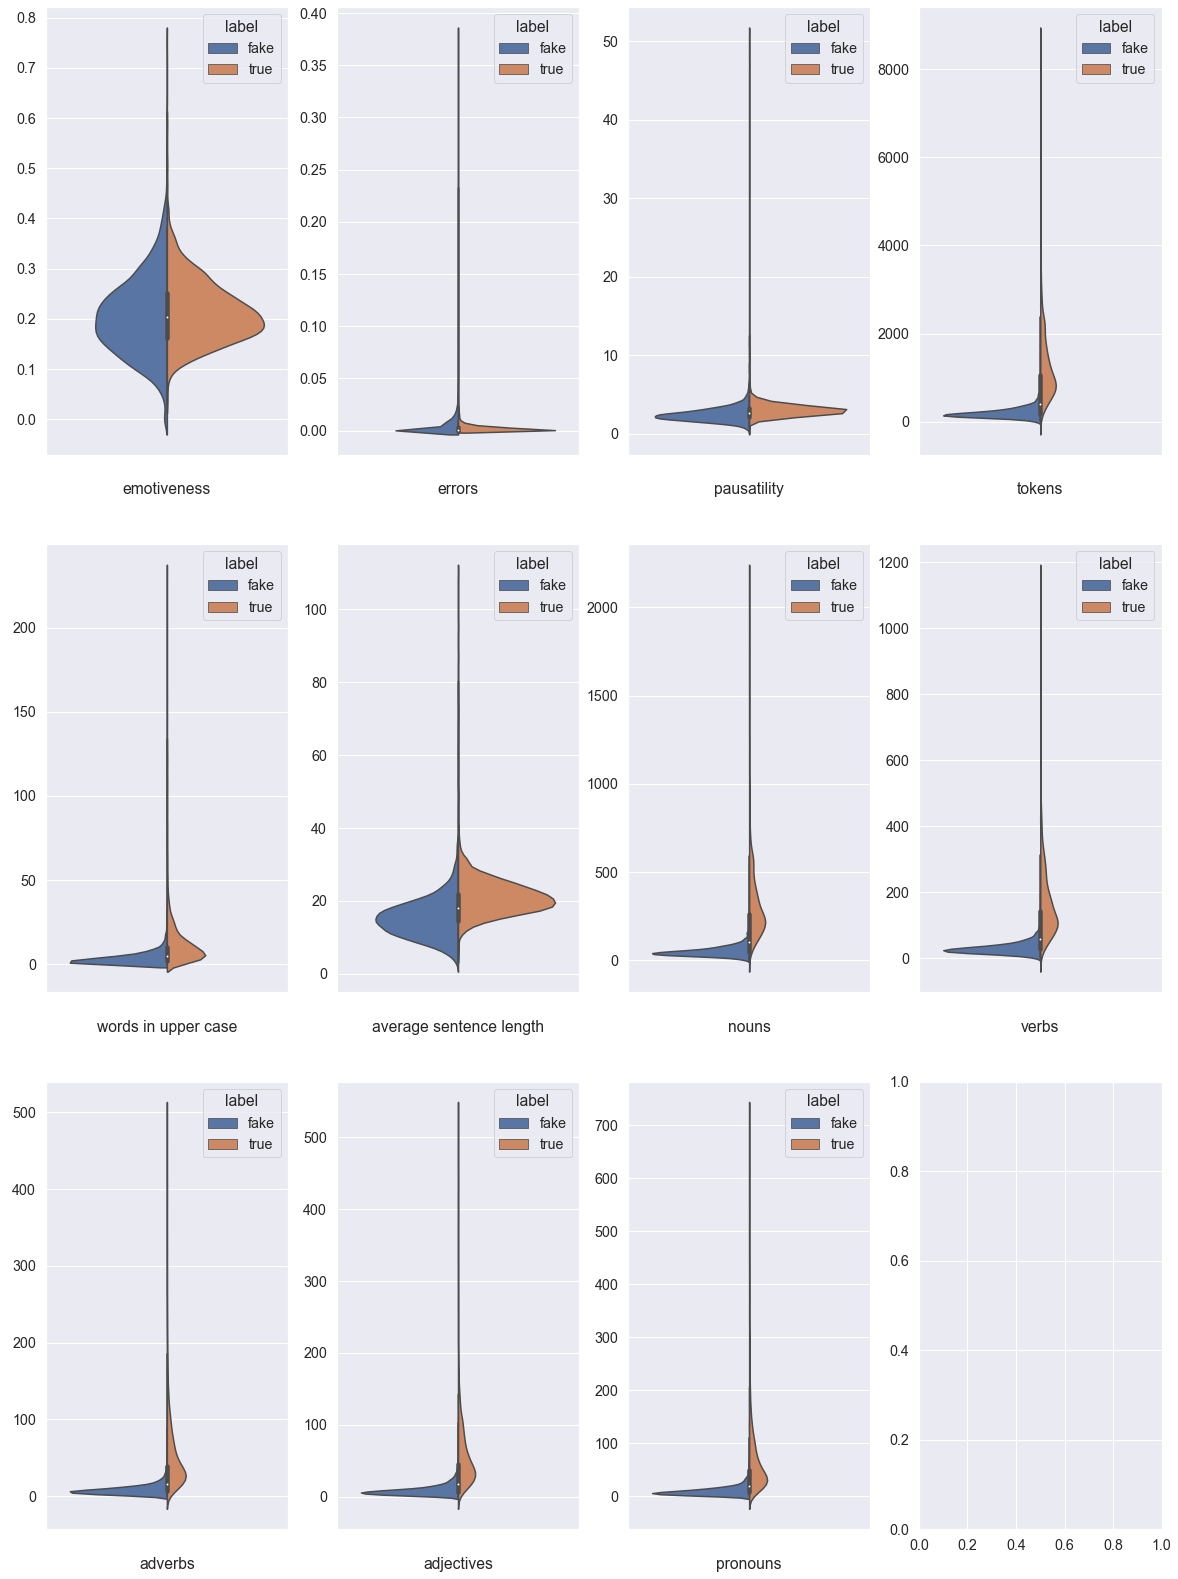

In [235]:
to_plot = [
    "emotiveness",
    "errors",
    "pausatility",
    "tokens",
    "words in upper case",
    "average sentence length",
    "nouns",
    "verbs",
    "adverbs",
    "adjectives",
    "pronouns",
]
df["1"] = " "

f, axes = plt.subplots(3, 4)
f.set_figheight(28)
f.set_figwidth(20)
sns.set(font_scale=1.3)
for i, t in enumerate(to_plot):
    ax = sns.violinplot(
        x="1", hue="label", y=t, data=df, ax=axes[int(i / 4), i % 4], split=True
    )
    ax.set_xlabel(xlabel=t)
    ax.set_ylabel(ylabel=" ", fontsize=1)

plt.show()

Vamos normalizar as quantidades de substantivos, verbos e etc.. pelo tamanho do texto (quantidade de tokens) e refazer os violin plots

In [238]:
lista = [
    "words in upper case",
    "average sentence length",
    "nouns",
    "verbs",
    "adverbs",
    "adjectives",
    "pronouns",
]
for i in lista:
    df.loc[:, i] = df.loc[:, i] / df.loc[:, "tokens"]

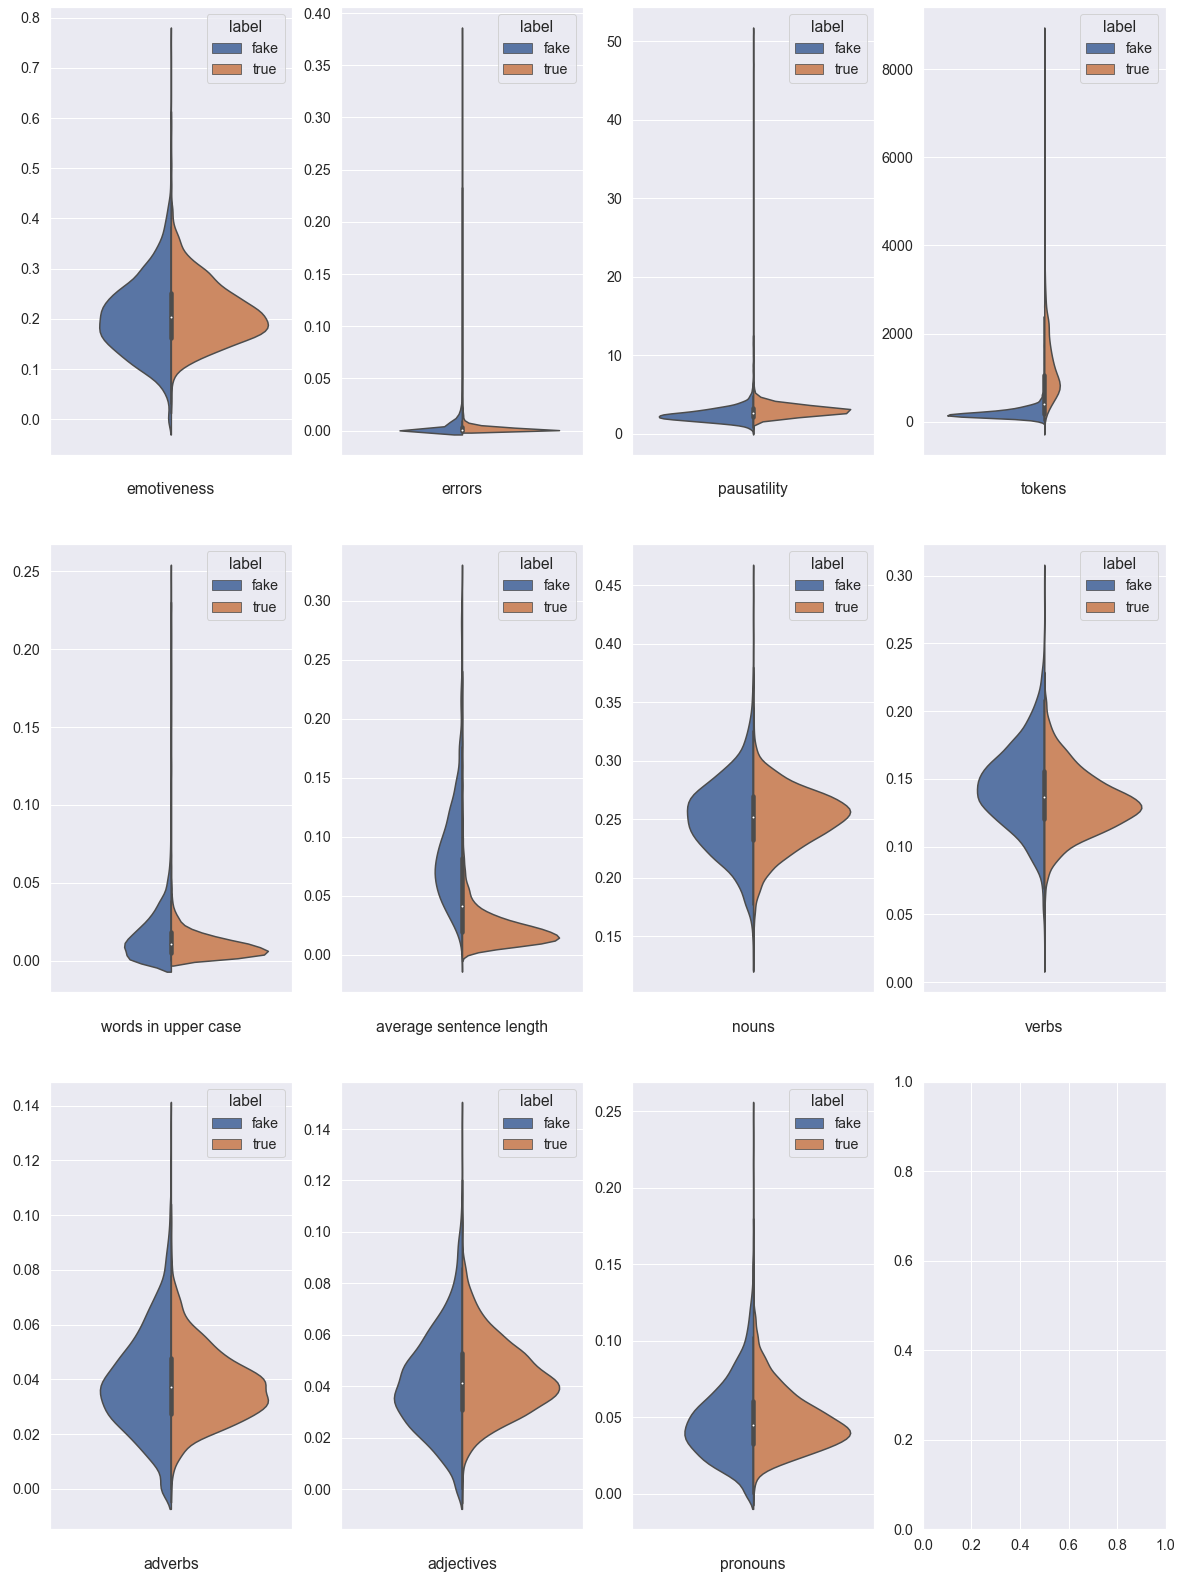

In [241]:
to_plot = [
    "emotiveness",
    "errors",
    "pausatility",
    "tokens",
    "words in upper case",
    "average sentence length",
    "nouns",
    "verbs",
    "adverbs",
    "adjectives",
    "pronouns",
]
df["1"] = " "

f, axes = plt.subplots(3, 4)
f.set_figheight(28)
f.set_figwidth(20)
sns.set(font_scale=1.3)
for i, t in enumerate(to_plot):
    ax = sns.violinplot(
        x="1", hue="label", y=t, data=df, ax=axes[int(i / 4), i % 4], split=True
    )
    ax.set_xlabel(xlabel=t)
    ax.set_ylabel(ylabel=" ", fontsize=1)

plt.show()

Com estes plots, é possível confirmar alguns resultados obtidos no jupyter _Analise features mais importantes_, cujos resultados demonstram que quanto maior o texto, maior as chances dele ser uma noticia verdadeira, tal distruibuição é possível ver no gráfico de _tokens_ acima. Além disso é possível perceber também uma certa tendencia nas _Fake News_ de possuirem sentenças mais longas que as notícias verdadeiras.

In [242]:
df[df["label"] == "fake"].describe()

,emotiveness,errors,pausatility,tokens,words in upper case,average sentence length,nouns,verbs,adverbs,adjectives,pronouns
count,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,0.205708,0.003859,2.468517,216.236667,0.017539,0.089292,0.251182,0.145065,0.038777,0.041378,0.048235
std,0.078667,0.009681,0.911004,147.300962,0.018426,0.047650,0.033956,0.030553,0.019011,0.019801,0.025650
min,0.000000,0.000000,0.250000,11.000000,0.000000,0.004190,0.134021,0.037383,0.000000,0.000000,0.000000
25%,0.151515,0.000000,1.888890,135.000000,0.005630,0.056835,0.228901,0.125000,0.025974,0.027491,0.030088
50%,0.200000,0.000000,2.339740,185.000000,0.013514,0.080084,0.251577,0.144400,0.037037,0.039626,0.045045
75%,0.253086,0.005780,2.900000,261.000000,0.024631,0.109980,0.273138,0.163865,0.050000,0.053435,0.062680
max,0.750000,0.382353,12.200000,2625.000000,0.247191,0.312085,0.454545,0.296296,0.134021,0.142857,0.246305


In [243]:
df[df["label"] == "true"].describe()

,emotiveness,errors,pausatility,tokens,words in upper case,average sentence length,nouns,verbs,adverbs,adjectives,pronouns
count,3600.000000,3600.000000,3600.000000,3600.00000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,0.213808,0.002270,3.042928,1269.29000,0.010001,0.023736,0.250655,0.132859,0.037757,0.043568,0.048221
std,0.060391,0.005107,1.292087,788.97881,0.008369,0.018525,0.025241,0.022950,0.012946,0.014329,0.019855
min,0.035088,0.000000,0.500000,22.00000,0.000000,0.001852,0.129341,0.016564,0.000000,0.000000,0.000000
25%,0.170221,0.000000,2.555560,738.75000,0.004474,0.012655,0.235238,0.118046,0.028610,0.033718,0.034314
50%,0.206299,0.001264,2.960365,1060.00000,0.008422,0.019325,0.252594,0.131213,0.036765,0.041984,0.044757
75%,0.250240,0.002864,3.416670,1631.25000,0.013463,0.028351,0.267280,0.146462,0.045478,0.052568,0.059015
max,0.590258,0.231151,51.238100,8634.00000,0.227273,0.233533,0.370575,0.220144,0.099153,0.114811,0.172455
